### ANN  Classification:- Customer Churn Data 

#### Step 0: Import important libraries
* Data preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Here we read our csv file and divide our data into dependent and independant features

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13] # Here we divide our data into dependent and independant features
y = dataset.iloc[:, 13]

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

#### In our data some categorical variable are there.So,To solve categorical variable problem we use one hot encoding.

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [9]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [10]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.shape

(10000, 11)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


#### Here we split our data into train and test set

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


#### Now we standardise or do scaling.

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
import tensorflow
print(tensorflow.__version__)

2.3.0


#### Import important things .Which we will use to make our ANN model

In [17]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### Now we make our ANN model 

In [18]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train.shape

(8000, 11)

In [22]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - 1s 11ms/step - loss: 0.6762 - accuracy: 0.6210 - val_loss: 0.5912 - val_accuracy: 0.7160
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5639 - accuracy: 0.7500 - val_loss: 0.5223 - val_accuracy: 0.7906
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.7959 - val_loss: 0.4878 - val_accuracy: 0.8099
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.8065 - val_loss: 0.4654 - val_accuracy: 0.8183
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8132 - val_loss: 0.4503 - val_accuracy: 0.8243
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4417 - accuracy: 0.8205 - val_loss: 0.4400 - val_accuracy: 0.8247
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4287 - accuracy: 0.8246 - val_loss: 0.4317 - val_accuracy: 0.8251
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8623 - val_loss: 0.3735 - val_accuracy: 0.8466
Epoch 60/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.8606 - val_loss: 0.3735 - val_accuracy: 0.8466
Epoch 61/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8602 - val_loss: 0.3733 - val_accuracy: 0.8474
Epoch 62/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3377 - accuracy: 0.8623 - val_loss: 0.3733 - val_accuracy: 0.8463
Epoch 63/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8617 - val_loss: 0.3732 - val_accuracy: 0.8478
Epoch 64/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.8627 - val_loss: 0.3734 - val_accuracy: 0.8470
Epoch 65/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3372 - accuracy: 0.8630 - val_loss: 0.3733 - val_accuracy: 0.8466
Epoch 

In [23]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Now we see our train and test accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


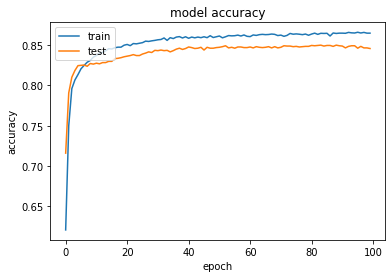

In [24]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

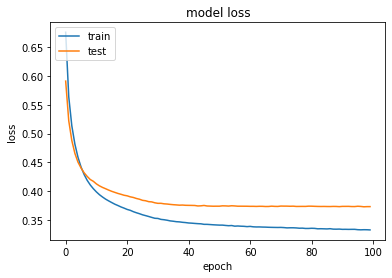

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [27]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[1521,   74],
       [ 209,  196]], dtype=int64)

In [30]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [31]:
score

0.8585

### Hey!!! We create our classification model by ANN . Our accuracy is also good. 